In [17]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import os

In [4]:
API_URL = "https://climate-api.open-meteo.com/v1/climate?"
COORDINATES = {
    "Madrid": {"latitude": 40.416775, "longitude": -3.703790},
    "London": {"latitude": 51.507351, "longitude": -0.127758},
    "Rio": {"latitude": -22.906847, "longitude": -43.172896},
}
VARIABLES = "temperature_2m_mean,precipitation_sum,soil_moisture_0_to_10cm_mean"
MODELS = (
    "CMCC_CM2_VHR4,FGOALS_f3_H,HiRAM_SIT_HR," "MRI_AGCM3_2_S,EC_Earth3P_HR,MPI_ESM1_2_XR,NICAM16_8S"
)

SLEEP_REQUEST = 1

def get_data_meteo_api(city, start_date, end_date):
    city_dict = COORDINATES[city]
    latitude = city_dict["latitude"]
    longitude = city_dict["longitude"]

    api_url = (
        f"https://climate-api.open-meteo.com/v1/climate?"
        f"latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={end_date}"
        f"&models={MODELS}"
        f"&daily={VARIABLES}"
    )

    return api_url


def api_request(api_url):
    n_tries = 100

    for _ in range(n_tries):
        response = requests.get(api_url)
        time.sleep(SLEEP_REQUEST)

        if response.status_code == 200:
            data = response.json()
            return data

        elif response.status_code == 404:
            print("The data you requested does not exist. Trying again")

        elif response.status_code == 401:
            print("You are not authorized to request this data. Trying again")

        else:
            print("Error. Trying again")

def get_yearly_mean_std(data_dict):

    df = pd.DataFrame(data_dict["daily"], index=pd.to_datetime(data_dict["daily"]["time"]))
    df.drop(columns="time", inplace=True)

    for variable in variable_dict.keys():
        variable_columns = [column for column in df.columns if variable in column]
        df[variable] = df[variable_columns].mean(axis=1)
        df.drop(columns=variable_columns, inplace=True)

    return df.groupby(df.index.year).agg(['mean', 'std'])


In [146]:
start_date = "1950-01-01"
end_date = "2049-12-31"

cities = ["Madrid"]


for city in cities:
    api_url = get_data_meteo_api(city, start_date, end_date)
    data_dict = api_request(api_url)

    variable_dict = {}

    for variable in VARIABLES.split(","):
        key = variable
        value = next((value for key,value in data_dict["daily_units"].items() if variable in key), None)
        variable_dict[key] = value

variable_dict

{'temperature_2m_mean': '°C',
 'precipitation_sum': 'mm',
 'soil_moisture_0_to_10cm_mean': 'm³/m³'}

In [147]:
def get_yearly_mean_std(data_dict):

    df = pd.DataFrame(data_dict["daily"], index=pd.to_datetime(data_dict["daily"]["time"]))
    df.drop(columns="time", inplace=True)

    for variable in variable_dict.keys():
        variable_columns = [column for column in df.columns if variable in column]
        df[variable] = df[variable_columns].mean(axis=1)
        df.drop(columns=variable_columns, inplace=True)

    return df.groupby(df.index.year).agg(['mean', 'std'])

    
df = get_yearly_mean_std(data_dict)
df


temperature_2m_mean           precipitation_sum            \
                    mean       std              mean       std   
1950           13.602544  7.501235          1.201910  1.310181   
1951           13.630607  7.596735          1.348145  1.275462   
1952           13.454762  7.325917          1.502283  1.525543   
1953           13.621213  7.312180          1.212384  1.420254   
1954           13.528885  7.119400          1.180481  1.345354   
...                  ...       ...               ...       ...   
2045           16.188493  7.855779          0.973260  1.294345   
2046           15.726380  8.234895          1.097683  1.294496   
2047           16.147789  8.187670          1.190814  1.494517   
2048           16.235363  7.939861          1.030464  1.406191   
2049           15.939100  7.721865          1.128376  1.342858   

     soil_moisture_0_to_10cm_mean            
                             mean       std  
1950                     0.254425  0.091474  
1951                     0.255808  0.080496  
1952                     0.248781  0.075073  
1953                     0.245137  0.078696  
1954                     0.230151  0.075013  
...                           ...       ...  
2045                      0.19907  0.064092  
2046                     0.226771  0.078001  
2047                     0.238825  0.065397  
2048                     0.216869  0.060679  
2049                     0.231584  0.074575  

[100 rows x 6 columns]

In [144]:


variable_dict

{'temperature_2m_mean': '°C',
 'precipitation_sum': 'mm',
 'soil_moisture_0_to_10cm_mean': 'm³/m³'}

In [142]:
for key,value in data_dict["daily_units"].items():
    print(value)

iso8601
°C
mm
m³/m³
°C
mm
m³/m³
°C
mm
m³/m³
°C
mm
m³/m³
°C
mm
m³/m³
°C
mm
m³/m³
°C
mm
m³/m³


In [137]:
data_dict["daily_units"]

{'time': 'iso8601',
 'temperature_2m_mean_CMCC_CM2_VHR4': '°C',
 'precipitation_sum_CMCC_CM2_VHR4': 'mm',
 'soil_moisture_0_to_10cm_mean_CMCC_CM2_VHR4': 'm³/m³',
 'temperature_2m_mean_FGOALS_f3_H': '°C',
 'precipitation_sum_FGOALS_f3_H': 'mm',
 'soil_moisture_0_to_10cm_mean_FGOALS_f3_H': 'm³/m³',
 'temperature_2m_mean_HiRAM_SIT_HR': '°C',
 'precipitation_sum_HiRAM_SIT_HR': 'mm',
 'soil_moisture_0_to_10cm_mean_HiRAM_SIT_HR': 'm³/m³',
 'temperature_2m_mean_MRI_AGCM3_2_S': '°C',
 'precipitation_sum_MRI_AGCM3_2_S': 'mm',
 'soil_moisture_0_to_10cm_mean_MRI_AGCM3_2_S': 'm³/m³',
 'temperature_2m_mean_EC_Earth3P_HR': '°C',
 'precipitation_sum_EC_Earth3P_HR': 'mm',
 'soil_moisture_0_to_10cm_mean_EC_Earth3P_HR': 'm³/m³',
 'temperature_2m_mean_MPI_ESM1_2_XR': '°C',
 'precipitation_sum_MPI_ESM1_2_XR': 'mm',
 'soil_moisture_0_to_10cm_mean_MPI_ESM1_2_XR': 'm³/m³',
 'temperature_2m_mean_NICAM16_8S': '°C',
 'precipitation_sum_NICAM16_8S': 'mm',
 'soil_moisture_0_to_10cm_mean_NICAM16_8S': 'm³/m³'}

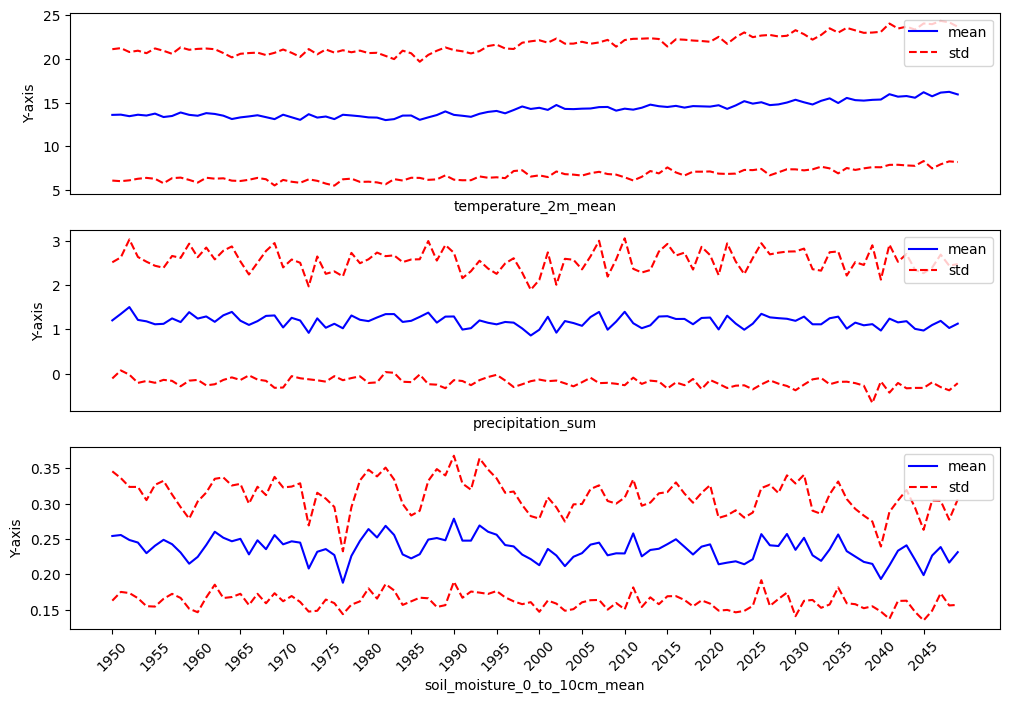

In [129]:
variable = "temperature_2m_mean"
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

for axe, variable in zip(axes, list_variables):

    init_year = df.index[0]
    end_year = df.index[-1]
    axe.set_xlabel(variable)
    axe.set_ylabel('Y-axis')

    axe.plot(df[variable]["mean"], '-b', label="mean")
    axe.plot(df[variable]["mean"] + df[variable]["std"], '--r', label="std")
    axe.plot(df[variable]["mean"] - df[variable]["std"], '--r')
    axe.set_xticks([])
    axe.legend()

custom_xticks = [
    year for year in range(init_year, end_year, 5)
]  # x label with two years spans

custom_xticks_labels = [
    str(year) for year in custom_xticks
]  # x label with two years spans

axes[-1].set_xticks(custom_xticks)
axes[-1].set_xticklabels(labels=custom_xticks_labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)

plt.show()

In [124]:
str(custom_xticks)

'[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045]'

In [74]:
df

,temperature_2m_mean,precipitation_sum,soil_moisture_0_to_10cm_mean
1950-01-01,5.471429,0.438571,0.3435
1950-01-02,5.400000,0.635714,0.341
1950-01-03,5.114286,2.085714,0.338
1950-01-04,4.671429,1.467143,0.335
1950-01-05,5.428571,1.965714,0.3425
...,...,...,...
2049-12-27,6.171429,0.964286,0.3425
2049-12-28,5.985714,2.461429,0.345
2049-12-29,6.528571,1.308571,0.3465
2049-12-30,5.885714,1.258571,0.338


In [72]:
result = variable_result.copy()
result

,mean,std
1950,0.254425,0.091474
1951,0.255808,0.080496
1952,0.248781,0.075073
1953,0.245137,0.078696
1954,0.230151,0.075013
...,...,...
2045,0.19907,0.064092
2046,0.226771,0.078001
2047,0.238825,0.065397
2048,0.216869,0.060679


In [70]:
list_variables

['temperature_2m_mean', 'precipitation_sum', 'soil_moisture_0_to_10cm_mean']

In [68]:
result = pd.DataFrame()

if result.empty:
    print(1)

1


In [58]:
df.index.year

Index([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       ...
       2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049],
      dtype='int32', length=36525)

In [60]:

result.c

SyntaxError: cannot assign to f-string expression here. Maybe you meant '==' instead of '='? (2914266195.py, line 1)

In [46]:

df['temperature_2m_mean_CMCC_CM2_VHR4']


1950-01-01    3.5
1950-01-02    3.9
1950-01-03    5.3
1950-01-04    5.6
1950-01-05    6.2
             ... 
2049-12-27    4.9
2049-12-28    3.5
2049-12-29    7.3
2049-12-30    7.3
2049-12-31    6.7
Name: temperature_2m_mean_CMCC_CM2_VHR4, Length: 36525, dtype: float64

In [33]:
columns

[]

In [36]:
df[df.columns[3]]

1950-01-01    7.8
1950-01-02    8.2
1950-01-03    8.1
1950-01-04    7.7
1950-01-05    7.0
             ... 
2049-12-27    3.0
2049-12-28    2.9
2049-12-29    3.5
2049-12-30    3.6
2049-12-31    4.1
Name: temperature_2m_mean_FGOALS_f3_H, Length: 36525, dtype: float64

In [14]:
columns = data_dict["daily"].keys()

temperature = [column for column in columns if "temperature_2m_mean" in column]
temperature

['temperature_2m_mean_CMCC_CM2_VHR4',
 'temperature_2m_mean_FGOALS_f3_H',
 'temperature_2m_mean_HiRAM_SIT_HR',
 'temperature_2m_mean_MRI_AGCM3_2_S',
 'temperature_2m_mean_EC_Earth3P_HR',
 'temperature_2m_mean_MPI_ESM1_2_XR',
 'temperature_2m_mean_NICAM16_8S']